In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

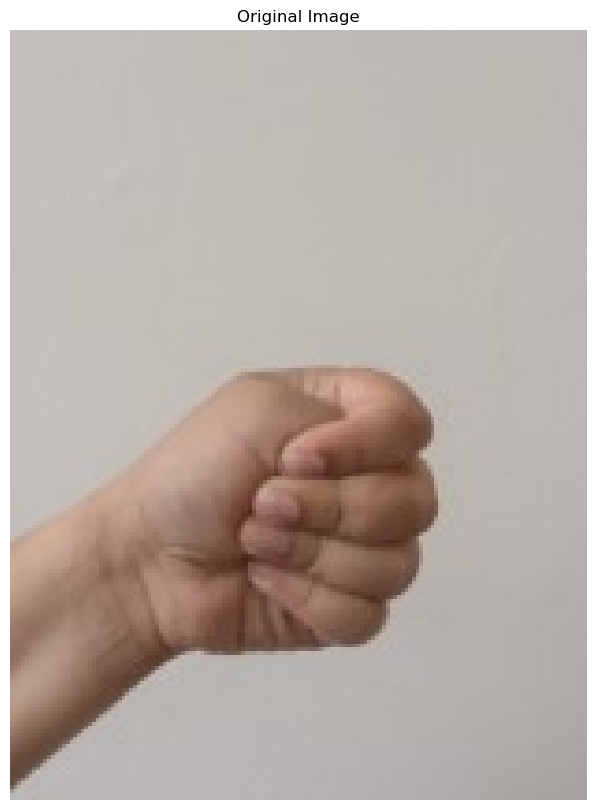

In [6]:
# Read the image
Gray_image = cv2.imread("D:\Drone\images\closedFist\IMG_20220509_130212.jpg", 0)  
image = cv2.imread("D:\Drone\images\closedFist\IMG_20220509_130212.jpg")
image =  cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=[10,10])
plt.imshow(image, cmap='gray');plt.title("Original Image");plt.axis("off");

In [7]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(Gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Display the total number of contours found.
print("Number of contours found = {}".format(len(contours)))

Number of contours found = 1


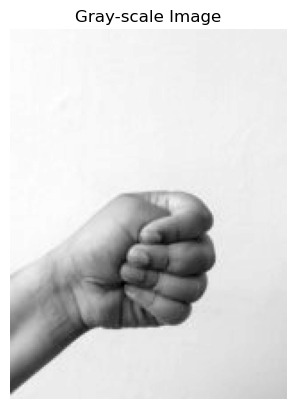

In [9]:
image2 = cv2.imread("D:\Drone\images\closedFist\IMG_20220509_130212.jpg") 
# Make a copy of the source image.
image2_copy = image2.copy()

# Convert the image to gray-scale
gray = cv2.cvtColor(image2_copy, cv2.COLOR_BGR2GRAY)

# Display the result
plt.imshow(gray, cmap="gray");plt.title("Gray-scale Image");plt.axis("off");

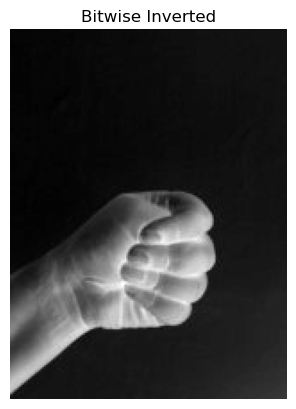

In [10]:
# Invert the colours
gray_inverted = cv2.bitwise_not(gray)

# Display the result
plt.imshow(gray_inverted ,cmap="gray");plt.title("Bitwise Inverted");plt.axis("off");

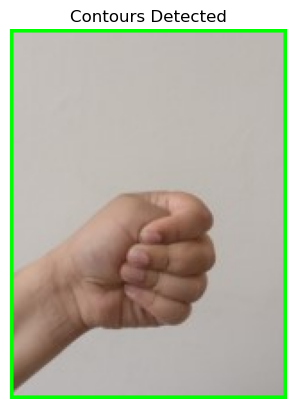

In [11]:
# find the contours from the inverted gray-scale image
contours, hierarchy = cv2.findContours(gray_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# draw all contours
cv2.drawContours(image2_copy, contours, -1, (0, 255, 0), 2)

# Display the result
plt.imshow(image2_copy[:,:,::-1]);plt.title("Contours Detected");plt.axis("off");

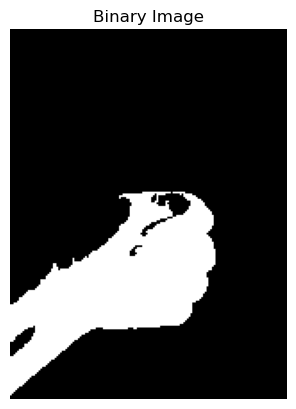

In [12]:
# create a binary thresholded image
_, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)

# Display the result 
plt.imshow(binary, cmap="gray");plt.title("Binary Image");plt.axis("off");

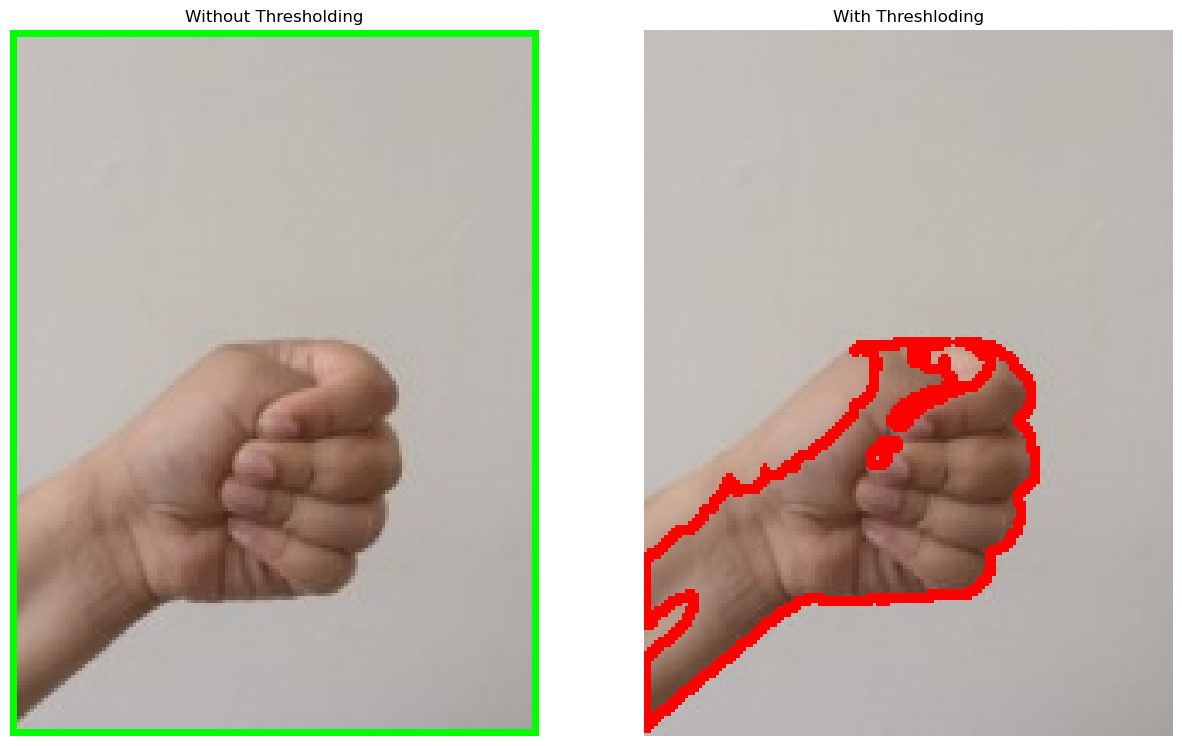

In [13]:
# Make a copy of the source image.
image2_copy2 = image2.copy()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# draw all the contours found
image2_copy2 = cv2.drawContours(image2_copy2, contours, -1, (0, 0, 255), 2)

# Plot both of the resuts for comparison
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image2_copy[:,:,::-1]);plt.title("Without Thresholding");plt.axis('off')
plt.subplot(122);plt.imshow(image2_copy2[:,:,::-1]);plt.title("With Threshloding");plt.axis('off');

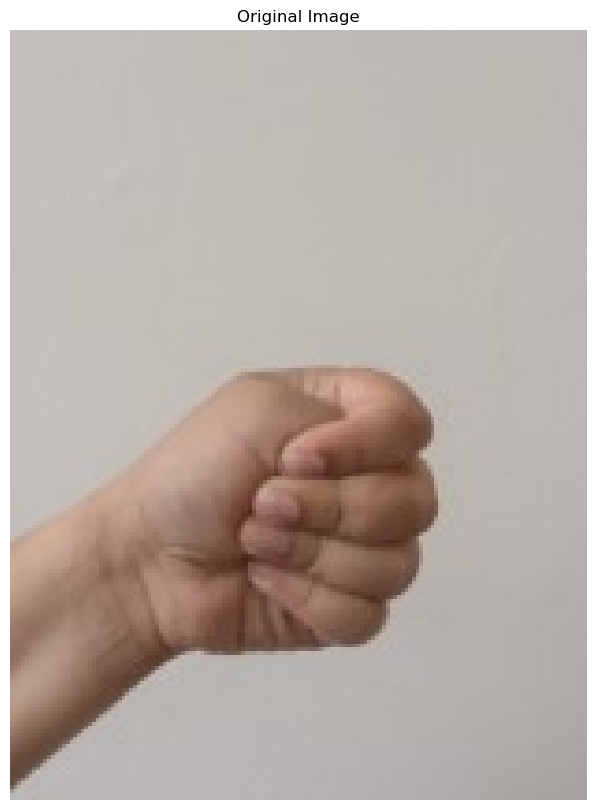

In [14]:
# Read the image
image3 = cv2.imread("D:\Drone\images\closedFist\IMG_20220509_130212.jpg") 

# Display the image
plt.figure(figsize=[10,10])
plt.imshow(image3[:,:,::-1]);plt.title("Original Image");plt.axis("off");

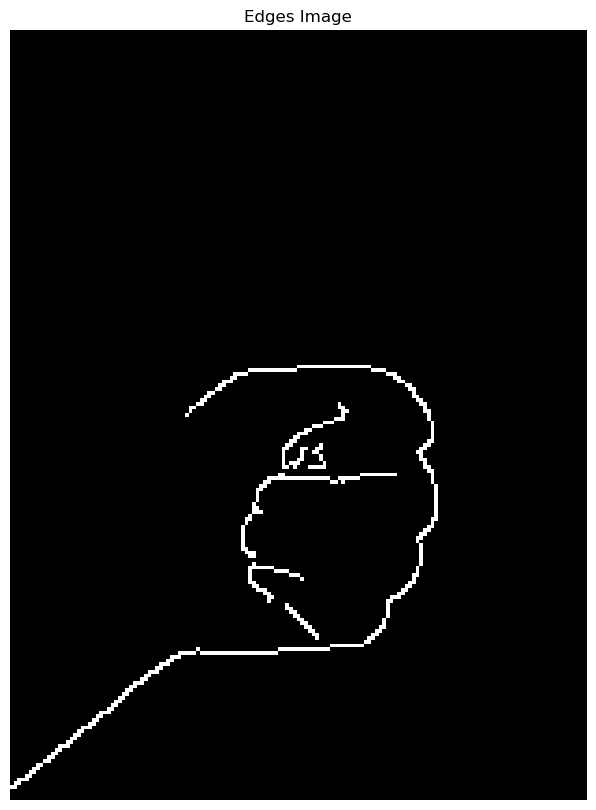

In [15]:
# Blur the image to remove noise
blurred_image = cv2.GaussianBlur(image3.copy(),(5,5),0)

# Apply canny edge detection
edges = cv2.Canny(blurred_image, 100, 160)

# Display the resultant binary image of edges
plt.figure(figsize=[10,10])
plt.imshow(edges,cmap='Greys_r');plt.title("Edges Image");plt.axis("off");

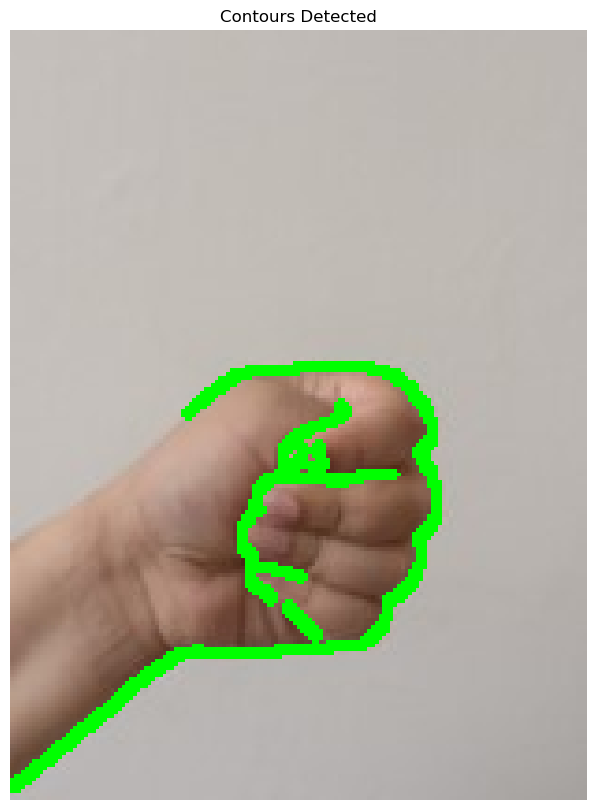

In [16]:
# Detect the contour using the using the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours
image3_copy = image3.copy()
cv2.drawContours(image3_copy, contours, -1, (0, 255, 0), 2)

# Display the drawn contours
plt.figure(figsize=[10,10])
plt.imshow(image3_copy[:,:,::-1]);plt.title("Contours Detected");plt.axis("off");

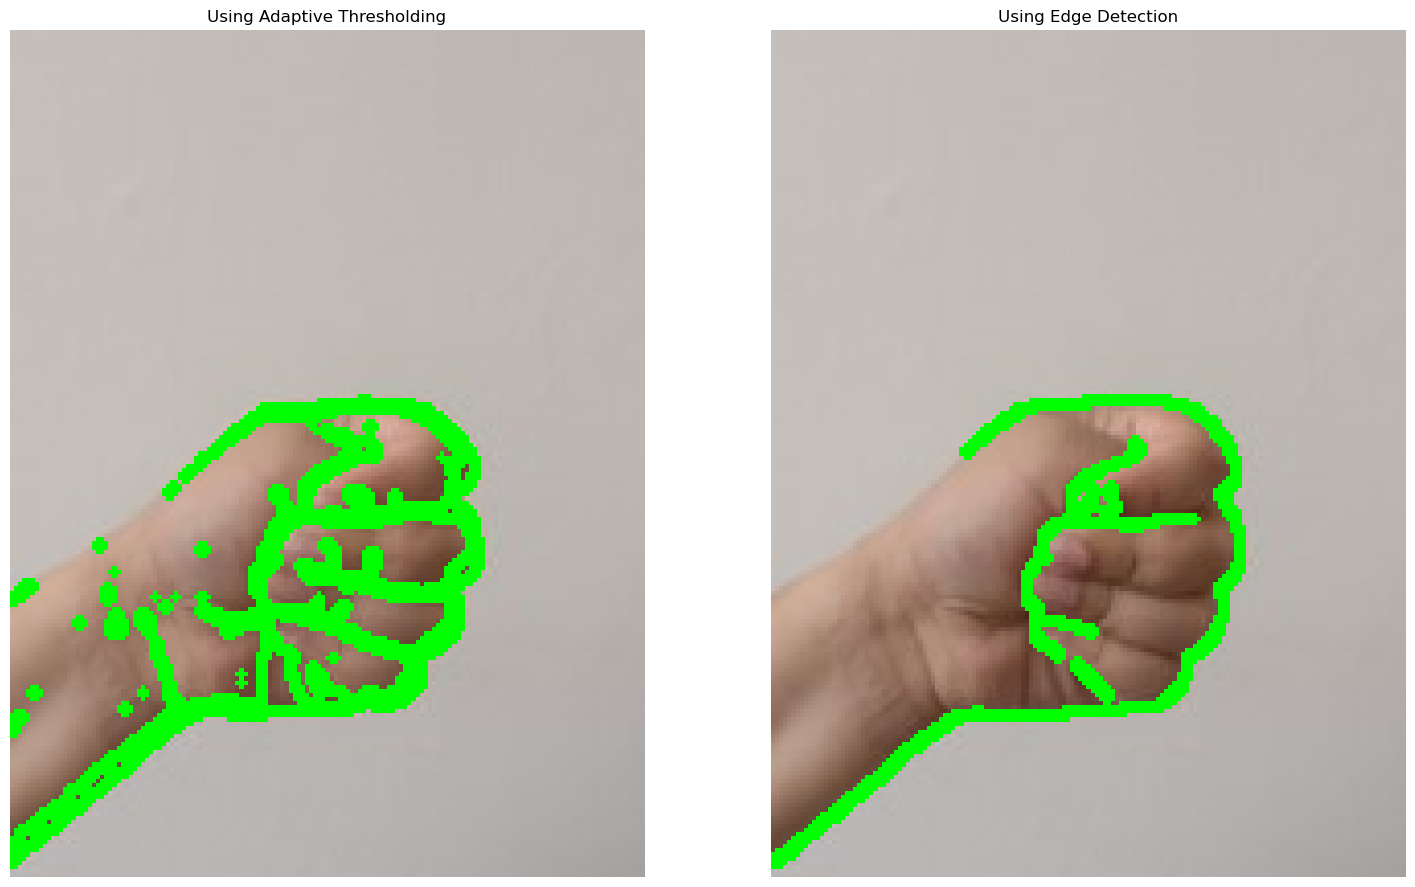

In [17]:
image3_copy2 = image3.copy()

# Remove noise from the image
blurred = cv2.GaussianBlur(image3_copy2,(3,3),0)

# Convert the image to gray-scale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Perform adaptive thresholding 
binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 5)

# Detect and Draw contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image3_copy2, contours, -1, (0, 255, 0), 2)

# Plotting both results for comparison
plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(image3_copy2[:,:,::-1]);plt.title("Using Adaptive Thresholding");plt.axis('off')
plt.subplot(122);plt.imshow(image3_copy[:,:,::-1]);plt.title("Using Edge Detection");plt.axis('off');